# Tweet classification: Trump vs. Trudeau

# 1. Import the libraries

- Note : use a specific random state for your solution.

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets, svm, model_selection, metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# 2. Read the dataset

In [37]:
df = pd.read_csv('tweets.csv')
df

,id,author,status
0,1,Donald J. Trump,I will be making a major statement from the @W...
1,2,Donald J. Trump,Just arrived at #ASEAN50 in the Philippines fo...
2,3,Donald J. Trump,"After my tour of Asia, all Countries dealing w..."
3,4,Donald J. Trump,Great to see @RandPaul looking well and back o...
4,5,Donald J. Trump,Excited to be heading home to see the House pa...
...,...,...,...
395,396,Justin Trudeau,RT @googlecanada: Watch tmw: @JustinTrudeau di...
396,397,Justin Trudeau,"Today in Ottawa, I met with the Modern Treaty ..."
397,398,Justin Trudeau,Voici le sommaire de ma rencontre avec les Pre...
398,399,Justin Trudeau,RT @VeteransENG_CA: #Day1 of 11 Days of Rememb...


# 3. Split the dataset into X and y

In [29]:
X=df['status']
y=df['author']

# 4. Split the dataset into training set and testing set

In [38]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test =train_test_split(X , y , test_size=0.30, random_state=23)

# 5. Vectorize the tweets

- Note : Read about CountVectorizer and TfidfVectorizer methods and use them in training and testing dataset.

In [39]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [45]:
CV=CountVectorizer()
tV=TfidfVectorizer()
x_trainC=CV.fit_transform(X_train)
x_testC=CV.transform(X_test)
x_traint=tV.fit_transform(X_train)
x_testt=tV.transform(X_test)

# 6. Train a Logistic Regression model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [46]:
from sklearn.linear_model import LogisticRegression
logC=LogisticRegression()
logt=LogisticRegression()
logC.fit(x_train_count , y_train)
logt.fit(x_train_tfidf , y_train)

LogisticRegression()

# 7. Train a SVM model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [50]:
from sklearn.svm import SVC
svmC=SVC()
svmt=SVC()
svmC.fit(x_trainC,y_train)
svmt.fit(x_traint,y_train)

SVC()

# 8. Make a prediction and calculate the score for both Logistic Regression and SVM

In [60]:
log_C_preduction = logC.predict(x_testC)
log_t_prediction = logt.predict(x_testt)


score_logC=accuracy_score(y_test, log_C_preduction)
score_logt=accuracy_score(y_test, log_t_prediction)

print(f"Logistic Regression Score count:{score_logC}")
print(f"Logistic Regression Score Tfidf: {score_logt}")


svm_C_pred=svmC.predict(x_testC)
svm_t_pred=svmt.predict(x_testt)
score_svmC=accuracy_score(y_test, log_C_preduction)
score_svmt=accuracy_score(y_test, log_t_prediction)

print("SVM Score count: " , score_svmC)
print("SVM Score Tfidf: " , score_svmt)


Logistic Regression Score count:0.8833333333333333
Logistic Regression Score Tfidf: 0.8583333333333333
SVM Score count:  0.8833333333333333
SVM Score Tfidf:  0.8583333333333333


# 9. Plot a confusion matrix for both Logistic Regression and SVM

In [61]:
log_C_cm = confusion_matrix(y_test , log_C_preduction)
log_t_cm = confusion_matrix( y_test , log_t_prediction)
svm_C_cm = confusion_matrix(y_test , svm_C_pred)
svm_t_cm = confusion_matrix( y_test , svm_t_pred)

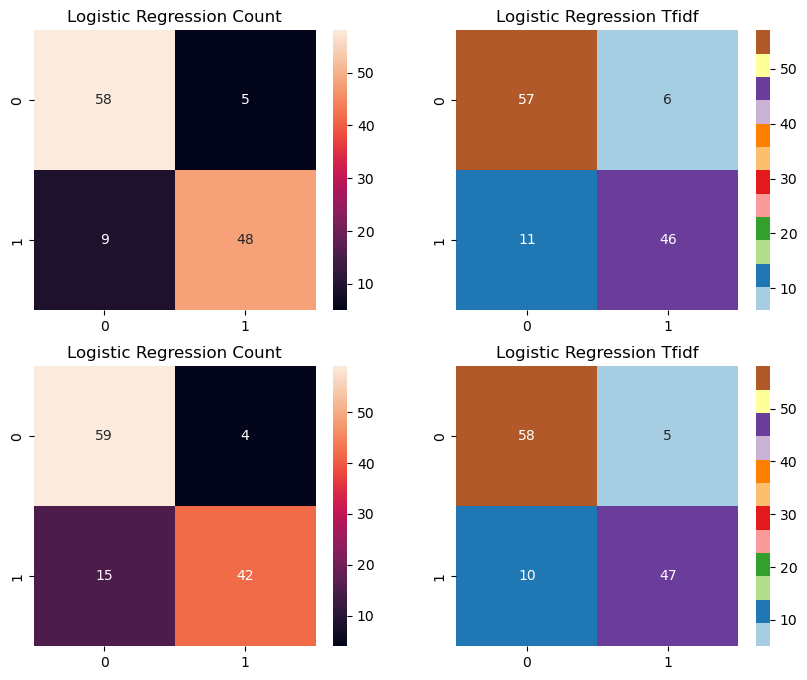

In [62]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.heatmap(log_C_cm, annot = True)
plt.title('Logistic Regression Count')

plt.subplot(2, 2, 2)
sns.heatmap(log_t_cm, annot=True, cmap = 'Paired')
plt.title('Logistic Regression Tfidf')

plt.subplot(2, 2, 3)
sns.heatmap(svm_C_cm, annot = True)
plt.title('Logistic Regression Count')

plt.subplot(2, 2, 4)
sns.heatmap(svm_t_cm, annot=True, cmap = 'Paired')
plt.title('Logistic Regression Tfidf')


plt.show()
